<a href="https://colab.research.google.com/github/harshada891git/python-codes/blob/main/ML_PROJECT_AUTHOR_IDENTIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*FINAL*

# AUTHOR IDENTIFICATION BY MULTINOMIAL NAIVE BAYES

[Report](https://docs.google.com/document/d/1y1EaUIal3Ma7ZVxN65fPgjV_Qs8wpeAd/edit?usp=sharing&ouid=106731915395796850223&rtpof=true&sd=true)

### ML Lab Project 2022

All imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/author_identification/train.csv',index_col = 0))
df.head()

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL


Note that
- EAP: Edgar Allen Poe
- HPL: HP Lovecraft
- MWS: Mary Wollstonecraft Shelley

In [ ]:
df['text'][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

- This removes stopwords, cleans the text and assigns higher value to unique words.
- TFIDF-Term Frequency Inverse Document Frequency

In [ ]:
global vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X = vectorizer.fit_transform(df['text'])
print(X)

  (0, 23988)	0.21696364362967083
  (0, 23052)	0.3020034613752269
  (0, 15882)	0.2559503341763652
  (0, 8144)	0.2052999200715928
  (0, 1620)	0.2407393021862237
  (0, 19497)	0.20621425345940886
  (0, 16441)	0.19726524833055104
  (0, 18392)	0.20353956045559748
  (0, 3675)	0.29558576878201387
  (0, 13253)	0.18471034157047353
  (0, 6830)	0.29864855674549473
  (0, 6069)	0.2742498756190863
  (0, 1269)	0.31998444990842223
  (0, 13553)	0.20311289030711907
  (0, 452)	0.2540972823244096
  (0, 16946)	0.2813134552560119
  (1, 13929)	0.5230718227301623
  (1, 13692)	0.41209186654388175
  (1, 9165)	0.5943778533208967
  (1, 14936)	0.45087817564810995
  (2, 19018)	0.24781357639605875
  (2, 19381)	0.19755701579869472
  (2, 16596)	0.1857832566905073
  (2, 9778)	0.21029769358945272
  (2, 551)	0.17052744670322914
  :	:
  (19574, 12987)	0.2702275822951441
  (19575, 3794)	0.5971840599916342
  (19575, 12739)	0.5237677915663489
  (19575, 20376)	0.6074853899556912
  (19576, 499)	0.4024615124367227
  (19576, 8332

We use selector module from sklearn to extract features with highest TFIDF value attached. This reduces computation time.

In [ ]:
y = df['author']
global selector
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)
X = selector.transform(X).toarray()

Note that increasing the percentie value will increase accuracy but this will make colab crash multiple times.

[Moltinomial nb resources ](https://www.mygreatlearning.com/blog/multinomial-naive-bayes-explained/)

Multinomial Naïve Bayes considers a feature vector where a given term represents the number of times it appears i.e. frequency.

In [ ]:
model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
print('Train set score:', score_train)

Train set score: 0.8615833637358629


In [ ]:
model.predict(X_test)

array(['EAP', 'MWS', 'EAP', ..., 'MWS', 'HPL', 'HPL'], dtype='<U3')

In [ ]:
print('Test set score:',model.score(X_test,y_test))

Test set score: 0.811712631937351


Printing the metrics

In [ ]:
y_pred=model.predict(X_test)
y_actual=y_test
print(confusion_matrix(y_actual,y_pred),'\n\n')
print(classification_report(y_actual,y_pred))

[[2116   67  152]
 [ 399 1187   91]
 [ 350   47 1465]] 


              precision    recall  f1-score   support

         EAP       0.74      0.91      0.81      2335
         HPL       0.91      0.71      0.80      1677
         MWS       0.86      0.79      0.82      1862

    accuracy                           0.81      5874
   macro avg       0.84      0.80      0.81      5874
weighted avg       0.83      0.81      0.81      5874



[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

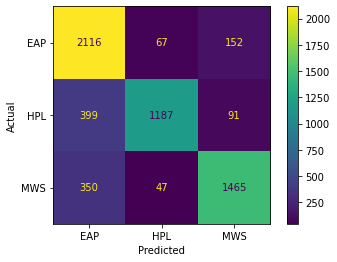

In [ ]:
cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_actual,y_pred), display_labels=['EAP', 'HPL', 'MWS'])
cmd_obj.plot()
cmd_obj.ax_.set(xlabel='Predicted', ylabel='Actual')